# Notebook setup

In [1]:
! pip install mplhep > /dev/null

In [2]:
! pip install zfit==0.16.0 > /dev/null
# Installing the latest stable version of zfit
#!pip install mplhep

ERROR: tensorflow-probability 0.21.0 has requirement typing-extensions<4.6.0, but you'll have typing-extensions 4.8.0 which is incompatible.
ERROR: tensorflow 2.13.1 has requirement typing-extensions<4.6.0,>=3.6.6, but you'll have typing-extensions 4.8.0 which is incompatible.


In [3]:
! pip install zfit[nlopt] > /dev/null

In [4]:
! pip install seaborn > /dev/null

In [5]:
! pip install install numpy==1.22 > /dev/null

In [6]:
# Importing python libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import sys
from pathlib import Path
from matplotlib._api import check_in_list

# # Google Colab

# from google.colab import drive
# drive.mount('/content/drive')
# sys.path.append('drive/MyDrive/colab2021/scripts')

# in jupyter (lab / notebook), based on notebook path
module_path = str(Path.cwd().parents[0] / "py")

if module_path not in sys.path:
    sys.path.append(module_path)

# Importing custom libraries
import plot_tools
import zfit
import customPDFs

/home/carlos/.local/lib/python3.8/site-packages/zfit/__init__.py:63: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(


# Zfit setup

In [7]:
# Setting the seed for zfit
zfit.settings.set_seed(seed=42, numpy=True, backend=True)

In [8]:
cos = zfit.Space('cosThetaKMu', [-1,1])
AFB = zfit.Parameter('AFB', 0)
FH = zfit.Parameter('FH', 0.002)
decay_rate = customPDFs.decayWidth(AFB, FH, cos) # Crea una PDF del Base PDF de zfit
cos_np = np.linspace(-1, 1, 1000)
AFB.set_value(0), FH.set_value(0.02)

(<zfit.util.temporary.TemporarilySet at 0x7fb3fa7f96a0>,
 <zfit.util.temporary.TemporarilySet at 0x7fb3fa7f9a30>)

In [9]:
sampler = decay_rate.create_sampler(100000) # Sets n parameter in the sampler class
# sampler.resample() # Generates the sample, running it again changes the sample

## Plotting the model and sample

(array([ 825., 2135., 3278., 4318., 5231., 5880., 6437., 7013., 7324.,
        7436., 7442., 7183., 7024., 6540., 5904., 5253., 4390., 3342.,
        2248.,  797.]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <BarContainer object of 20 artists>)

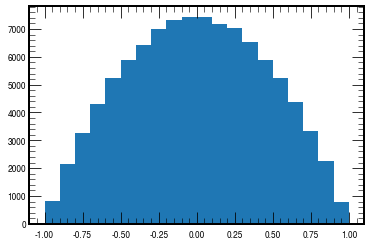

In [10]:
plt.hist(sampler.numpy(), bins=20, range=[-1,1])

'decayWidth' object has no attribute 'models'


(array([ 825., 2135., 3278., 4318., 5231., 5880., 6437., 7013., 7324.,
        7436., 7442., 7183., 7024., 6540., 5904., 5253., 4390., 3342.,
        2248.,  797.]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]))

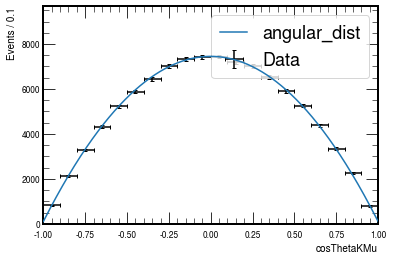

In [11]:
plot_tools.plot_model(sampler.numpy(), decay_rate,
                      bins=20, density=True)

'decayWidth' object has no attribute 'models'


((array([ 825., 2135., 3278., 4318., 5231., 5880., 6437., 7013., 7324.,
         7436., 7442., 7183., 7024., 6540., 5904., 5253., 4390., 3342.,
         2248.,  797.]),
  array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
          0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])),
 15.24037193447599)

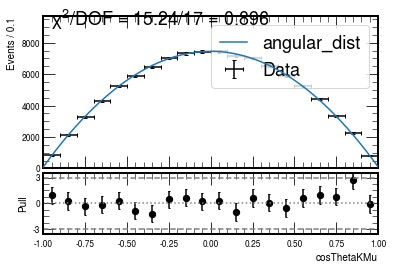

In [12]:
# Declared this variable
º = sampler.numpy()
fig = plt.figure()
axes = plot_tools.create_axes_for_pulls(fig)
plot_tools.plot_model(º, decay_rate, bins=20,
                  axis=axes[0], pulls=True, axis_pulls=axes[1],
                  chi_x=0.02, chi_y=0.9)

# Minimizing

## NLOpt implementation

In [13]:
nlopt_min = zfit.minimize.NLoptSLSQPV1()

In [14]:
# Creating the loss function
nll = zfit.loss.UnbinnedNLL(decay_rate, sampler)

In [15]:
start = time.time()
nlopt_minimization = nlopt_min.minimize(nll)
end = time.time()
print("Minimization time with NLOpt", end - start)

Minimization time with NLOpt 4.065949201583862


In [16]:
nlopt_minimization

FitResult of
<UnbinnedNLL model=[<zfit.<class 'customPDFs.decayWidth'>  params=[AFB, FH]] data=[<zfit.core.data.Sampler object at 0x7fb3f8e0e5b0>] constraints=[]> 
with
<NLoptSLSQPV1 NLopt SLSQP tol=0.001>

╒═════════╤═════════════╤══════════════════╤═════════╤══════════════════════════════════╕
│  valid  │  converged  │  param at limit  │   edm   │   approx. fmin (full | internal) │
╞═════════╪═════════════╪══════════════════╪═════════╪══════════════════════════════════╡
│  True   │    True     │      False       │ 2.5e-06 │             57576.60 |  9999.551 │
╘═════════╧═════════════╧══════════════════╧═════════╧══════════════════════════════════╛

Parameters
name      value  (rounded)    at limit
------  ------------------  ----------
AFB              0.0013382       False
FH               0.0204643       False

In [21]:
start = time.time()
nlopt_minimization.hesse()
end = time.time()
print("Hessian errors time with NLOpt", end - start)

Hessian errors time with NLOpt 0.005683422088623047


## Minuit

In [18]:
# Doing the same but with Minuit

start = time.time()
# Minimization with zfit minuit

MIN = zfit.minimize.Minuit()
minimum = MIN.minimize(nll)


end = time.time()
print("Minimization time with Minuit", end - start)

start = time.time()
minimum.hesse()
end = time.time()

print("Hessian errors time with Minuit", end - start)

Minimization time with Minuit 0.5165648460388184
Hessian errors time with Minuit 0.30479979515075684


In [19]:
minimum

FitResult of
<UnbinnedNLL model=[<zfit.<class 'customPDFs.decayWidth'>  params=[AFB, FH]] data=[<zfit.core.data.Sampler object at 0x7fb3f8e0e5b0>] constraints=[]> 
with
<Minuit Minuit tol=0.001>

╒═════════╤═════════════╤══════════════════╤═════════╤══════════════════════════════════╕
│  valid  │  converged  │  param at limit  │   edm   │   approx. fmin (full | internal) │
╞═════════╪═════════════╪══════════════════╪═════════╪══════════════════════════════════╡
│  True   │    True     │      False       │ 1.9e-09 │             57576.60 |  9999.551 │
╘═════════╧═════════════╧══════════════════╧═════════╧══════════════════════════════════╛

Parameters
name      value  (rounded)        hesse    at limit
------  ------------------  -----------  ----------
AFB             0.00133883  +/-  0.0014       False
FH               0.0204571  +/-  0.0033       False

# Basic MLOpt test

In [ ]:
import nlopt
from numpy import *
def myfunc(x, grad):
    if grad.size > 0:
        grad[0] = 0.0
        grad[1] = 0.5 / sqrt(x[1])
    return sqrt(x[1])
def myconstraint(x, grad, a, b):
    if grad.size > 0:
        grad[0] = 3 * a * (a*x[0] + b)**2
        grad[1] = -1.0
    return (a*x[0] + b)**3 - x[1]
opt = nlopt.opt(nlopt.LD_MMA, 2)
opt.set_lower_bounds([-float('inf'), 0])
opt.set_min_objective(myfunc)
opt.add_inequality_constraint(lambda x,grad: myconstraint(x,grad,2,0), 1e-8)
opt.add_inequality_constraint(lambda x,grad: myconstraint(x,grad,-1,1), 1e-8)
opt.set_xtol_rel(1e-4)
x = opt.optimize([1.234, 5.678])
minf = opt.last_optimum_value()
print("optimum at ", x[0], x[1])
print("minimum value = ", minf)
print("result code = ", opt.last_optimize_result())